In [1]:
from arpes.io import load_data
import os.path

C:\Users\hellbrue\Documents\Repositories\pyarpes\arpes\config.py:54: UserWarning: Could not find local configuration file. If you don't have one, you can safely ignore this message.
  warnings.warn(msg)


Activating auto-logging. Current session state plus future input saved.
Filename       : logs\unnamed_2022-09-26_15-32-01.log
Mode           : backup
Output logging : False
Raw input log  : False
Timestamping   : False
State          : active


# First Overview of Bi2223 data from the 2nd Beamtime at PSI (Sample 4)
In this notebook I show a first summary of all the data we took at the second beamtime on the Bi2223 crystal Sample 4.
This contains an EDC at normal emission, multiple EDCs extracted in one scan at different Tilt angles and FS maps.

## EDC of Bi2223 (Normal Emission)

In [2]:
# Define directory
path = os.path.abspath("G:\My Drive\Bi2223\e19557\Beamtime2\Sample4\Bi2223")

# Different parameters used to set up scans at SLS
scan_type = 'EDC'
direction = '*'
phi = '*'
energy = '*'+'eV'
polarization = '*'
temp = '*'
e_pass = '*'+'eVpass'
comment = ''
run = '*'.zfill(4)

# Put together string for finding file
phi = phi.replace('+', 'P').replace('-', 'M').replace('.', 'p')
energy = energy.replace('.', 'p')
parameters = [scan_type, direction, phi, energy, polarization, temp, e_pass, comment, run]
if comment == '':
    parameters.remove(comment)
file_type = 'h5'
file_name = '_'.join(parameters)
file = '.'.join([file_name , file_type])

full_file = os.path.join(path, file)
file

'EDC_*_*_*eV_*_*_*eVpass_000*.h5'

In [3]:
import glob
# Load all files with above specified parameters, * is a placeholder and imports all files in its place
files = glob.glob(full_file)
print(len(files))
files

1


['G:\\My Drive\\Bi2223\\e19557\\Beamtime2\\Sample4\\Bi2223\\EDC_AN_P39_25eV_CIRCM_LT_20eVpass_0000.h5']

In [4]:
data_list = {}
for file in files:
    #data_list.append(load_data(file, location="ULTRA"))
    data = load_data(file, location="ULTRA")
    file_name = file.replace(path, '')[1:-3]
    data_list.update({file_name : data})

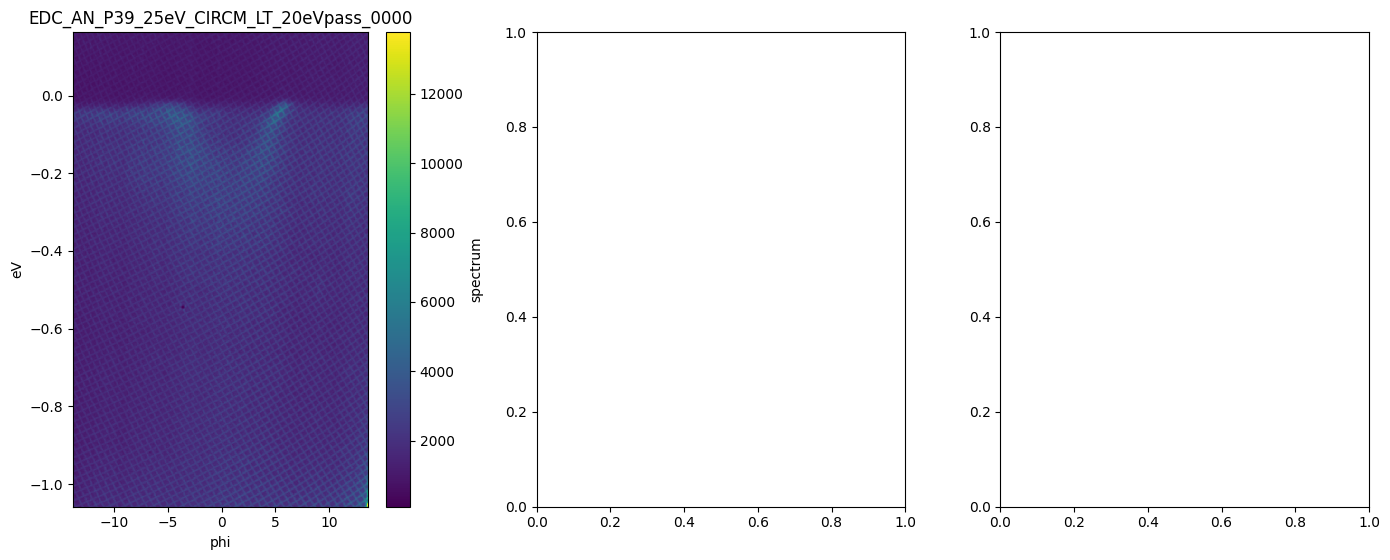

In [5]:
import matplotlib.pyplot as plt
import math
rows = math.ceil(len(data_list) / 3)
fig, ax = plt.subplots(rows, 3, figsize=(14, 6*rows))
    
for key in data_list.keys():
    data_list[key].spectrum.S.plot(ax=ax.ravel()[list(data_list).index(key)])
    ax.ravel()[list(data_list).index(key)].set_title(f"{key}")

plt.tight_layout(rect=[0, 0.03, 1, 0.98])

## EDCs of Bi2223 at different Tilt angles

In [6]:
# Define directory
path = os.path.abspath("G:\My Drive\Bi2223\e19557\Beamtime2\Sample4\Bi2223")

# Different parameters used to set up scans at SLS
scan_type = 'FS'
direction = '*'
phi = '*'
energy = '*'
polarization = '*'
temp = '*'
e_pass = '*'+'eVpass'
comment = '*'
run = '*'.zfill(4)

# Put together string for finding file
parameters = [scan_type, direction, phi, energy, polarization, temp, e_pass, comment, run]
if comment == '':
    parameters.remove(comment)
file_type = 'h5'
file_name = '_'.join(parameters)
file = '.'.join([file_name , file_type])

full_file = os.path.join(path, file)
file

'FS_*_*_*_*_*_*eVpass_*_000*.h5'

In [7]:
import glob
# Load all files with above specified parameters, * is a placeholder and imports all files in its place
files = glob.glob(full_file)
print(len(files))
files

1


['G:\\My Drive\\Bi2223\\e19557\\Beamtime2\\Sample4\\Bi2223\\FS_N_M6_26p5eV_CIRCM_LT_20eVpass_Tiltdep_0000.h5']

In [8]:
data_list = {}
for file in files:
    #data_list.append(load_data(file, location="ULTRA"))
    data = load_data(file, location="ULTRA")
    file_name = file.replace(path, '')[1:-3]
    data_list.update({file_name : data})

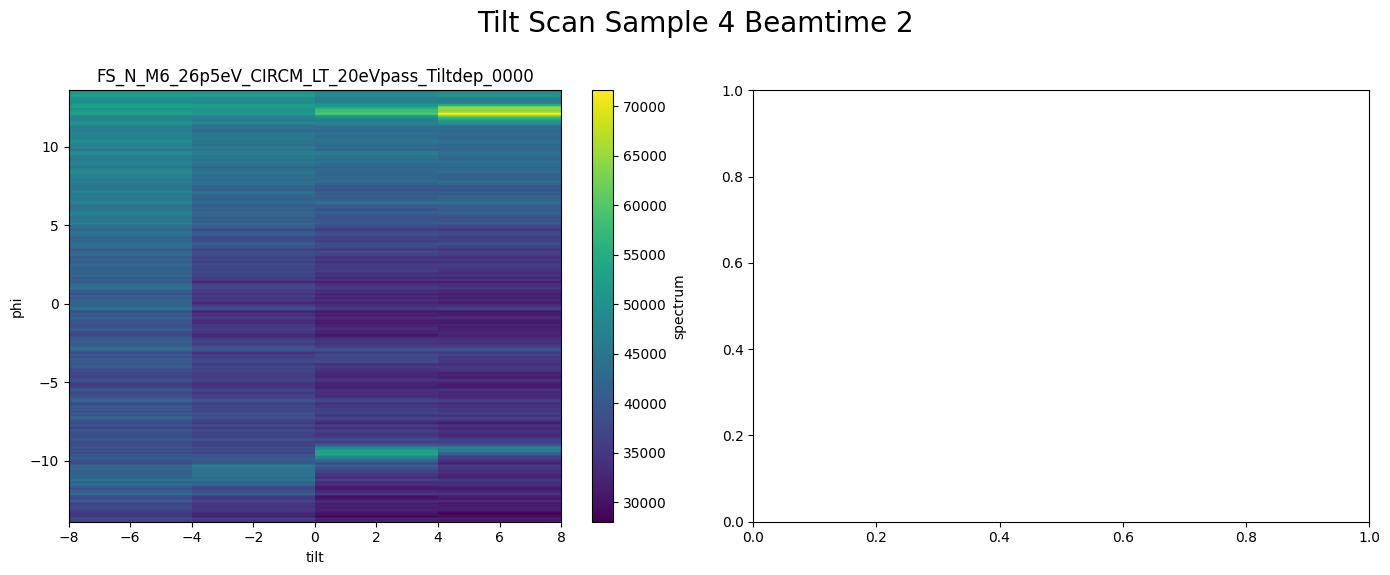

In [9]:
import matplotlib.pyplot as plt
import math
rows = math.ceil(len(data_list) / 2)
fig, ax = plt.subplots(rows, 2, figsize=(14, 6*rows))
fig.suptitle('Tilt Scan Sample 4 Beamtime 2', fontsize=20)
    
for key in data_list.keys():
    data = data_list[key].spectrum
    fs = data.sel(eV=slice(-0.02,0.02)).sum("eV")
    fs.plot(ax=ax.ravel()[list(data_list).index(key)])
    ax.ravel()[list(data_list).index(key)].set_title(f"{key}")

plt.tight_layout(rect=[0, 0.03, 1, 0.98])

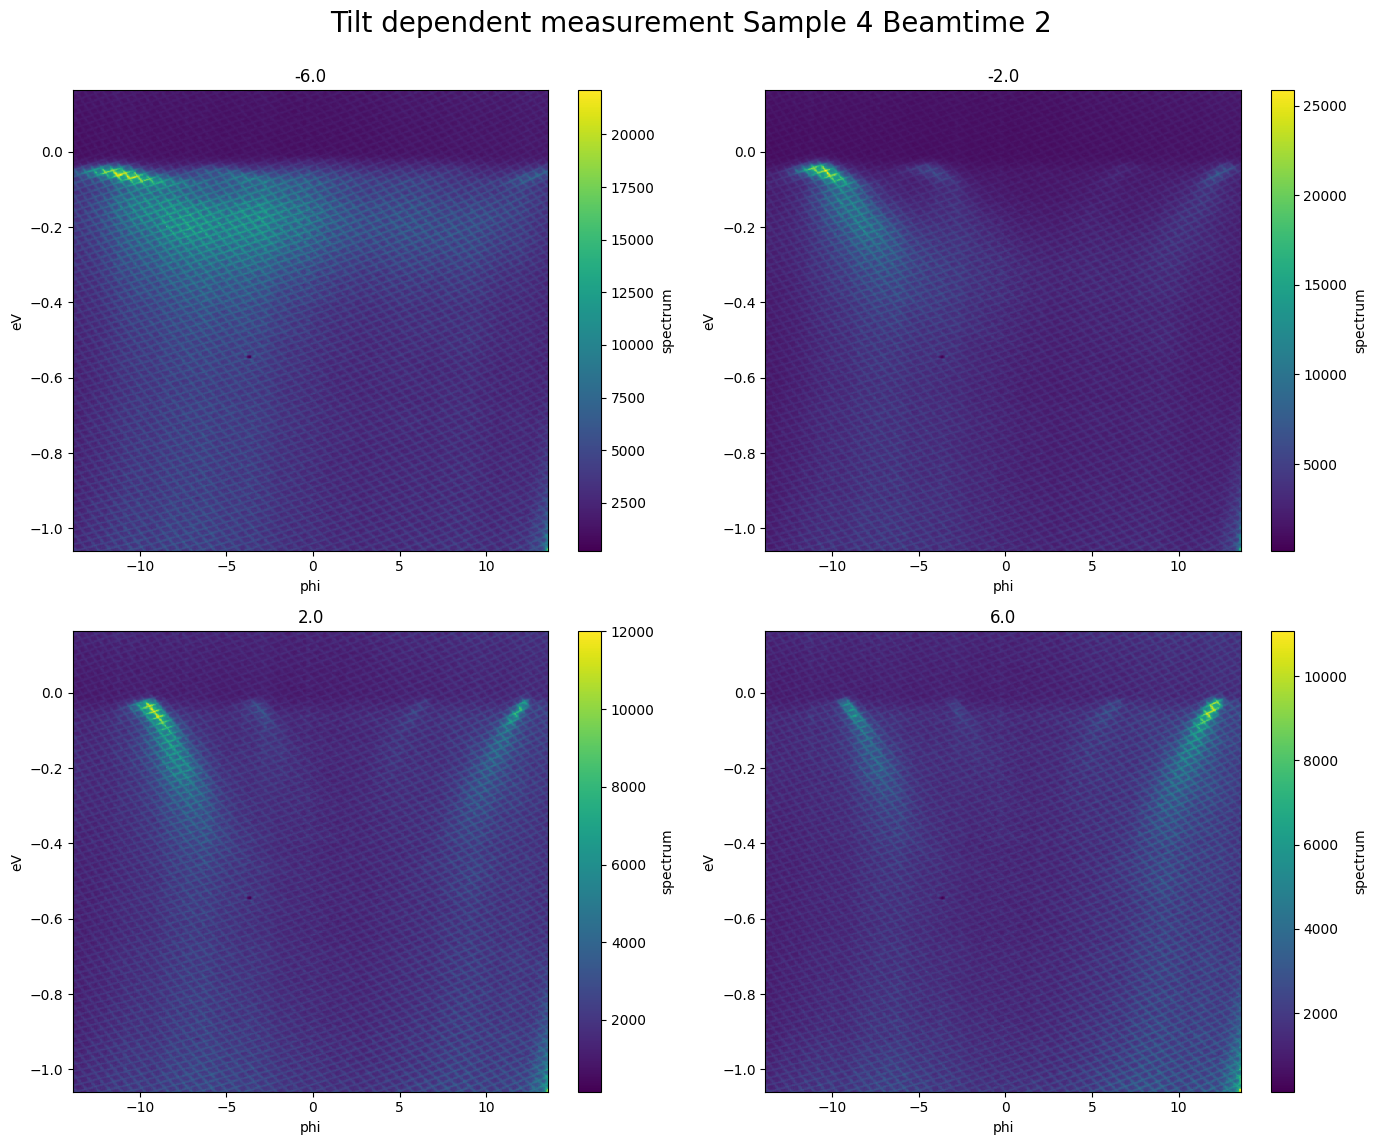

In [10]:
fig, ax = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('Tilt dependent measurement Sample 4 Beamtime 2 ', fontsize=20)

edc = data_list["FS_N_M6_26p5eV_CIRCM_LT_20eVpass_Tiltdep_0000"]
i = 0
for tilts in edc.coords["tilt"]:
    edc.sel(tilt=tilts).S.plot(ax=ax.ravel()[i])
    ax.ravel()[i].set_title(f"{tilts}")
    i += 1

plt.tight_layout(rect=[0, 0.03, 1, 0.98])

## FS maps of Bi2223

In [11]:
# Define directory
path = os.path.abspath("G:\My Drive\Bi2223\e19557\Beamtime2\Sample4\Bi2223")

# Different parameters used to set up scans at SLS
scan_type = 'FS'
direction = '*'
phi = '*'
energy = '*'+'eV'
polarization = '*'
temp = '*'
e_pass = '*'+'eVpass'
comment = ''
run = '*'.zfill(4)

# Put together string for finding file
phi = phi.replace('+', 'P').replace('-', 'M').replace('.', 'p')
energy = energy.replace('.', 'p')
parameters = [scan_type, direction, phi, energy, polarization, temp, e_pass, comment, run]
if comment == '':
    parameters.remove(comment)
file_type = 'h5'
file_name = '_'.join(parameters)
file = '.'.join([file_name , file_type])

full_file = os.path.join(path, file)
file

'FS_*_*_*eV_*_*_*eVpass_000*.h5'

In [12]:
import glob
# Load all files with above specified parameters, * is a placeholder and imports all files in its place
files = glob.glob(full_file)
print(len(files))
files

4


['G:\\My Drive\\Bi2223\\e19557\\Beamtime2\\Sample4\\Bi2223\\FS_N_M3_26p5eV_LHQ_LT_20eVpass_0000.h5',
 'G:\\My Drive\\Bi2223\\e19557\\Beamtime2\\Sample4\\Bi2223\\FS_N_M3_26p5eV_CIRCM_LT_20eVpass_0001.h5',
 'G:\\My Drive\\Bi2223\\e19557\\Beamtime2\\Sample4\\Bi2223\\FS_N_M3_26p5eV_CIRCM_LT_20eVpass_0000.h5',
 'G:\\My Drive\\Bi2223\\e19557\\Beamtime2\\Sample4\\Bi2223\\FS_AN_P39_25eV_CIRCM_LT_20eVpass_0000.h5']

In [13]:
data_list = {}
for file in files:
    #data_list.append(load_data(file, location="ULTRA"))
    data = load_data(file, location="ULTRA")
    file_name = file.replace(path, '')[1:-3]
    data_list.update({file_name : data})

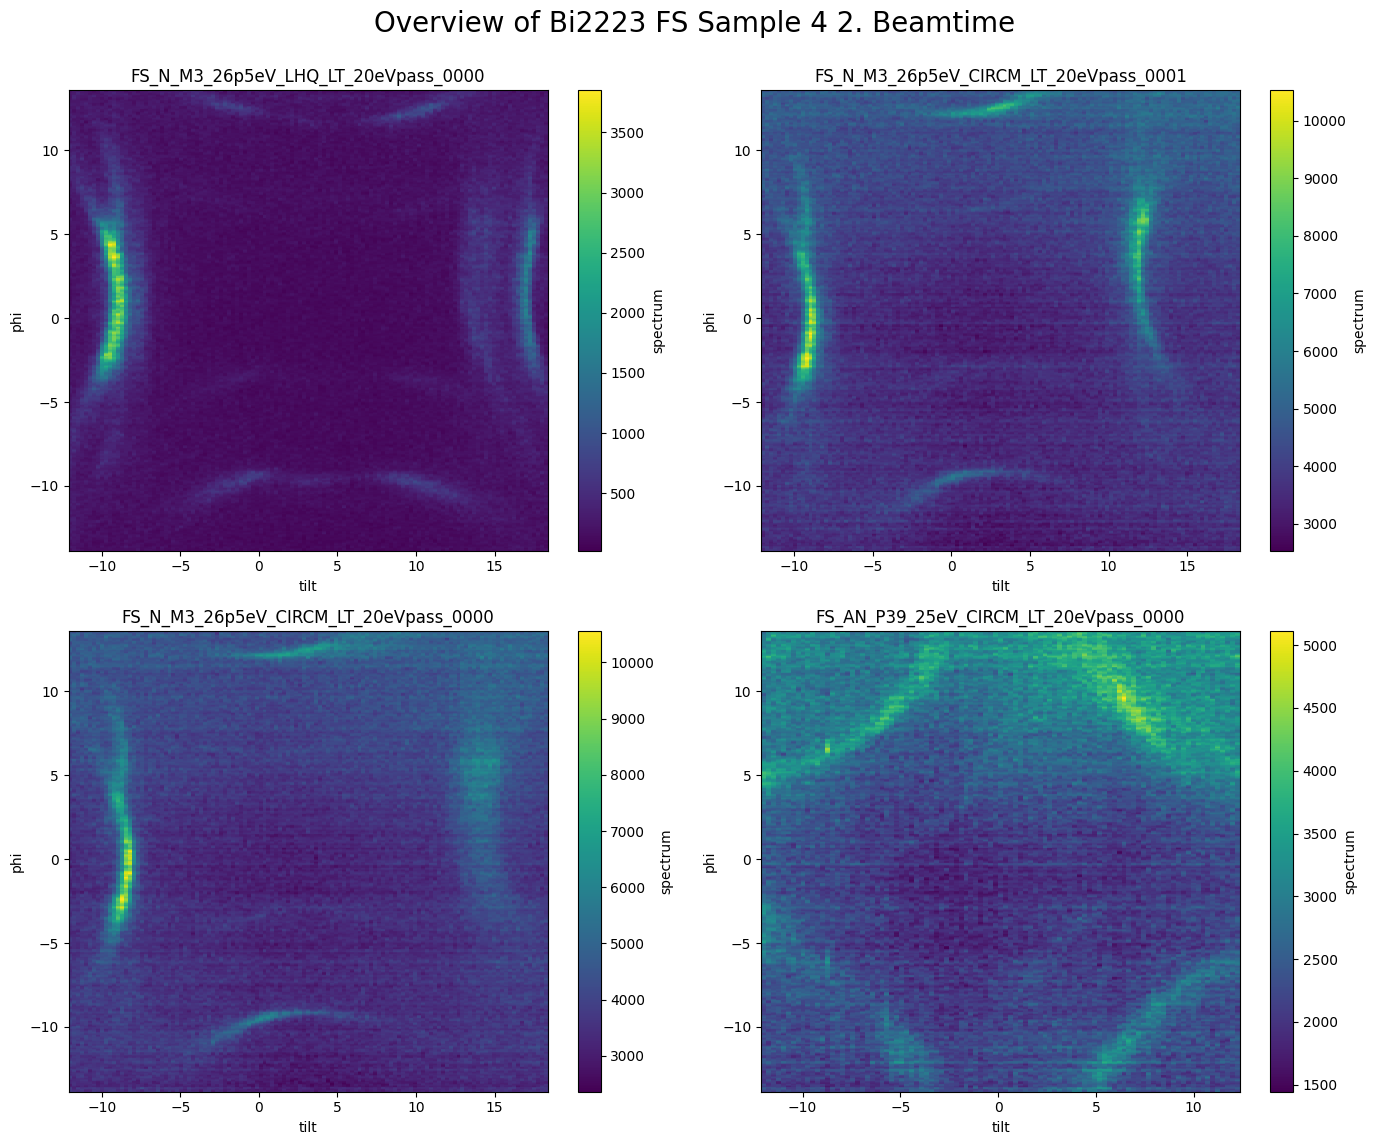

In [14]:
import matplotlib.pyplot as plt
import math
rows = math.ceil(len(data_list) / 2)
fig, ax = plt.subplots(rows, 2, figsize=(14, 6*rows))
fig.suptitle('Overview of Bi2223 FS Sample 4 2. Beamtime', fontsize=20)
    
for key in data_list.keys():
    data = data_list[key].spectrum
    fs = data.sel(eV=slice(-0.02,0.02)).sum("eV")
    fs.plot(ax=ax.ravel()[list(data_list).index(key)])
    ax.ravel()[list(data_list).index(key)].set_title(f"{key}")

plt.tight_layout(rect=[0, 0.03, 1, 0.98])